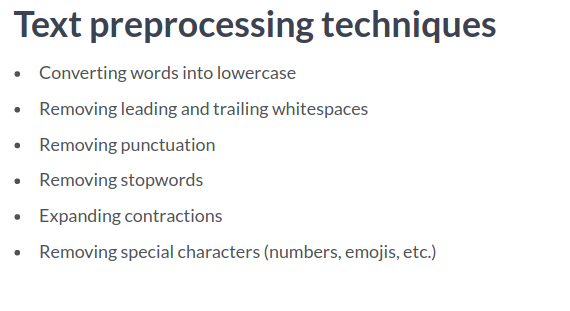

In [1]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [2]:
string = "Hello! I don't know what I'm doing here."

doc = nlp(string)

tokens = [token.text for token in doc]
print(tokens)

['Hello', '!', 'I', 'do', "n't", 'know', 'what', 'I', "'m", 'doing', 'here', '.']


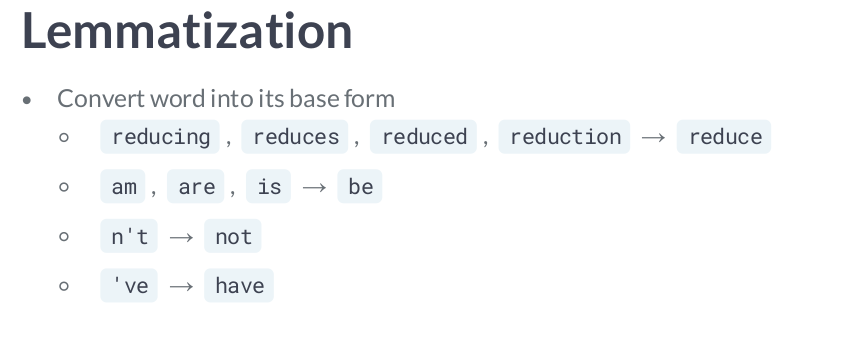

In [3]:
string = "Hello! I don't know what I'm doing here."

doc = nlp(string)

lemmas = [token.lemma_ for token in doc]
print(lemmas)

['hello', '!', '-PRON-', 'do', 'not', 'know', 'what', '-PRON-', 'be', 'do', 'here', '.']


In [4]:
print(' '.join(lemmas))

hello ! -PRON- do not know what -PRON- be do here .


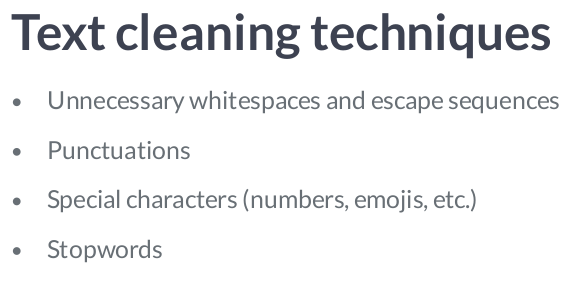

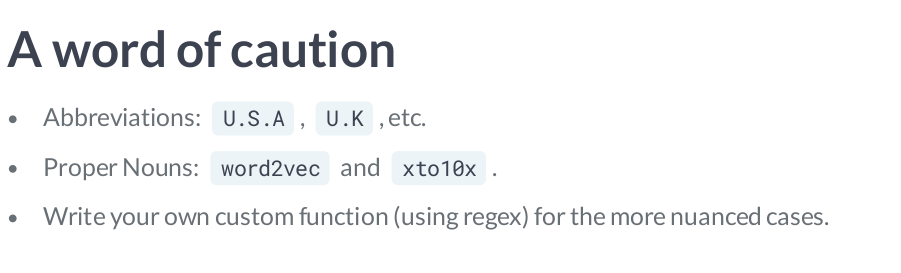

In [63]:
string = """
OMG!!!! This is like
the best thing ever \t\n.
Wow, such an amazing song! I'm hooked. Top 5 definitely. ?
"""
import spacy
# Generate list of tokens
nlp = spacy.load('en_core_web_sm')
doc = nlp(string)
lemmas = [token.lemma_ for token in doc]

In [64]:
# Remove tokens that are not alphabetic
a_lemmas = [lemma for lemma in lemmas if lemma.isalpha() or lemma == '-PRON-']
# Print string after text cleaning
print(' '.join(a_lemmas))

OMG this be like the good thing ever wow such an amazing song -PRON- be hooked top definitely


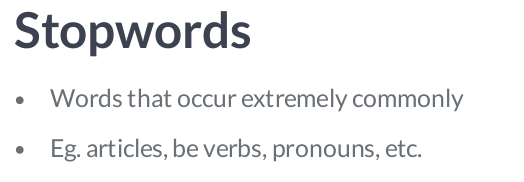

In [65]:
# Get list of stopwords
stopwords = spacy.lang.en.stop_words.STOP_WORDS
string = """
OMG!!!! This is like
the best thing ever \t\n.
Wow, such an amazing song! I'm hooked. Top 5 definitely. ?
"""

In [66]:
# Remove stopwords and non-alphabetic tokens
a_lemmas = [lemma for lemma in lemmas if lemma.isalpha() and lemma not in stopwords]
# Print string after text cleaning
print(' '.join(a_lemmas))

OMG like good thing wow amazing song hooked definitely


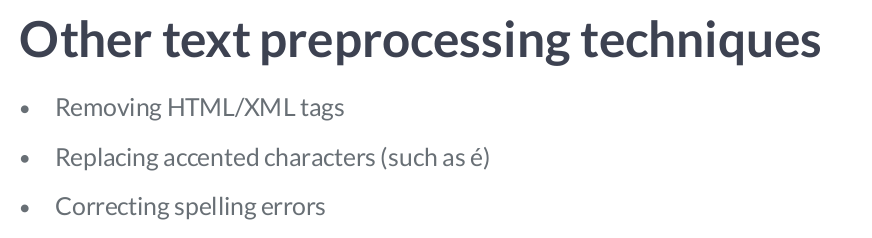

In [67]:
# Function to preprocess text
def preprocess(text):
  	# Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    
    return ' '.join(a_lemmas)

In [68]:
preprocess(string)

'OMG like good thing wow amazing song hooked definitely'

# Part-of-speech tagging

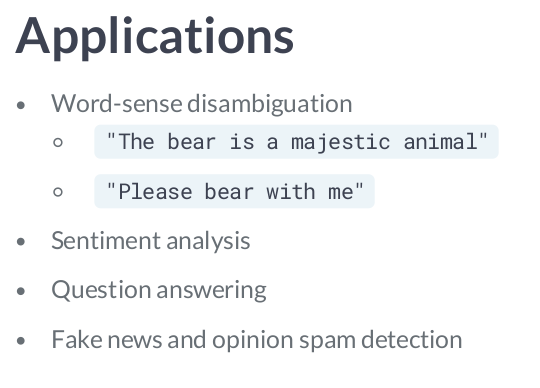

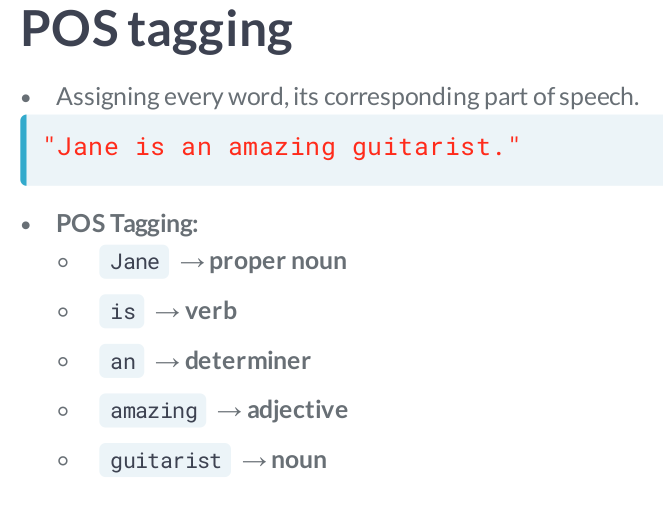

In [69]:
import spacy
# Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

In [70]:
# Initiliaze string
string = "Jane is an amazing guitarist"

In [71]:
# Create a Doc object
doc = nlp(string)

In [72]:
# Generate list of tokens and pos tags
pos = [(token.text, token.pos_) for token in doc]
print(pos)

[('Jane', 'PROPN'), ('is', 'AUX'), ('an', 'DET'), ('amazing', 'ADJ'), ('guitarist', 'NOUN')]


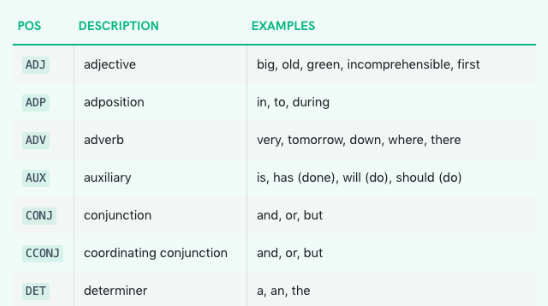

In [73]:
!wget https://assets.datacamp.com/production/repositories/4375/datasets/dd0cbaa4d6df483b6cb8fb8365152f5e3d743990/fakenews.csv

--2020-02-27 23:38:26--  https://assets.datacamp.com/production/repositories/4375/datasets/dd0cbaa4d6df483b6cb8fb8365152f5e3d743990/fakenews.csv
Resolving assets.datacamp.com (assets.datacamp.com)... 54.192.151.54, 54.192.151.57, 54.192.151.84, ...
Connecting to assets.datacamp.com (assets.datacamp.com)|54.192.151.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7397 (7.2K) [text/csv]
Saving to: ‘fakenews.csv’

fakenews.csv        100%[===================>]   7.22K  --.-KB/s    in 0s      

2020-02-27 23:38:28 (449 MB/s) - ‘fakenews.csv’ saved [7397/7397]



In [75]:
import pandas as pd

df = pd.read_csv('fakenews.csv')
df.head()

,Unnamed: 0,title,label
0,0,You Can Smell Hillary’s Fear,FAKE
1,1,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE
2,2,Kerry to go to Paris in gesture of sympathy,REAL
3,3,Bernie supporters on Twitter erupt in anger ag...,FAKE
4,4,The Battle of New York: Why This Primary Matters,REAL


In [76]:
def noun(s):
    doc = nlp(s)
    pos = [token.pos_ for token in doc]
    return pos.count("NOUN")

In [77]:
df['Noun_count'] = df.title.apply(noun)

In [78]:
df.head()

,Unnamed: 0,title,label,Noun_count
0,0,You Can Smell Hillary’s Fear,FAKE,1
1,1,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE,1
2,2,Kerry to go to Paris in gesture of sympathy,REAL,2
3,3,Bernie supporters on Twitter erupt in anger ag...,FAKE,3
4,4,The Battle of New York: Why This Primary Matters,REAL,0


In [79]:
def adj(s):
    doc = nlp(s)
    pos = [token.pos_ for token in doc]
    return pos.count("ADJ")

In [80]:
df['Adj_count'] = df.title.apply(adj)
df.head()

,Unnamed: 0,title,label,Noun_count,Adj_count
0,0,You Can Smell Hillary’s Fear,FAKE,1,0
1,1,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE,1,1
2,2,Kerry to go to Paris in gesture of sympathy,REAL,2,0
3,3,Bernie supporters on Twitter erupt in anger ag...,FAKE,3,1
4,4,The Battle of New York: Why This Primary Matters,REAL,0,1


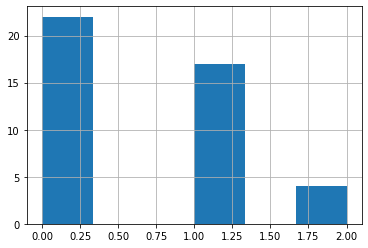

In [88]:
df.Adj_count[df.label=='FAKE'].hist(bins=6)

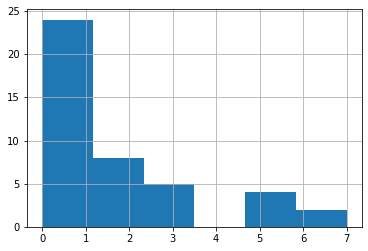

In [89]:
df.Noun_count[df.label=='FAKE'].hist(bins=6)

# Named entity recognition

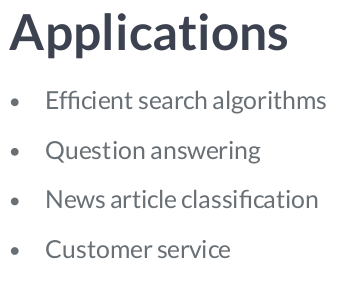

In [90]:
import spacy
string = "John Doe is a software engineer working at Google. He lives in France."
# Load model and create Doc object
nlp = spacy.load('en_core_web_sm')
doc = nlp(string)
# Generate named entities
ne = [(ent.text, ent.label_) for ent in doc.ents]
print(ne)

[('John Doe', 'PERSON'), ('Google', 'ORG'), ('France', 'GPE')]


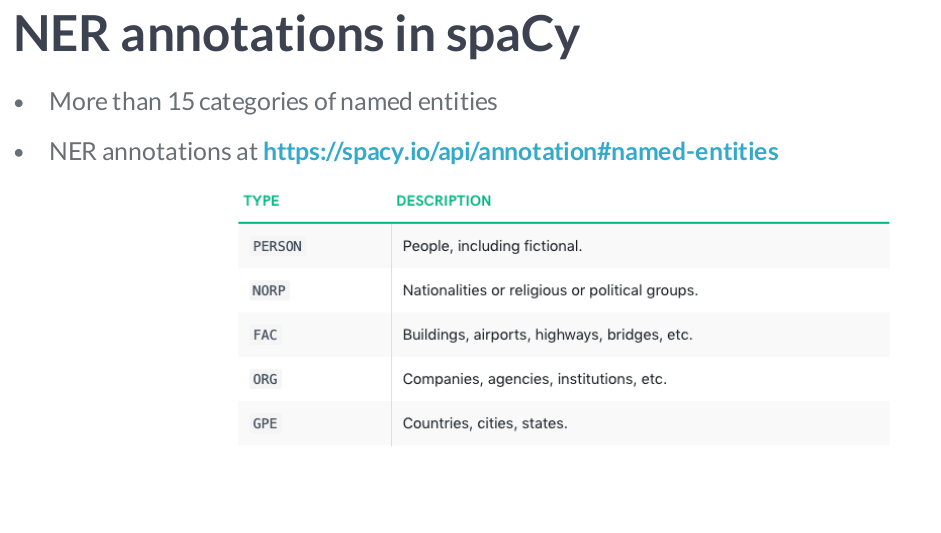

In [91]:
def find_persons(text):
  # Create Doc object
  doc = nlp(text)
  
  # Identify the persons
  persons = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']
  
  # Return persons
  return persons

In [95]:
find_persons(df.title[1])

['Paul Ryan']